In [1]:
from pymongo import MongoClient
import pandas as pd  
import numpy as np 

client = MongoClient('localhost', 27017)
db = client['twitter']

pipeline=[{ "$project": {  "id_user" : 1, "originalTweet" : 1, "hashtag" : 1, "mention" : 1} }]

cursor_list = list(db['tweets'].aggregate(pipeline))

In [2]:
tweets = pd.DataFrame(cursor_list)
data = pd.DataFrame(columns=['Tweets'])
data['Tweets'] = tweets['originalTweet']
# data['user_id'] = tweets['id_user']
# data['len']  = np.array([len(tweet) for tweet in data['Tweets']])
# data['hahtags'] = tweets['hashtag']
# data['mentions'] = tweets['mention']
# user = list()
# for i in range(0,len(tweets)):
#     user.append(tweets['user'][i]['name'])
# data['user'] = np.array(user)

In [3]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from nltk.corpus import stopwords
from utils import tokenize_and_stem
 
    
documents = data['Tweets']

myStopWords=set(stopwords.words('english')+list(['http','https']))                             
    
vectorizer = TfidfVectorizer(use_idf=True,
                             ngram_range=(1,5),
                             min_df=100, max_features=300, tokenizer=tokenize_and_stem, stop_words=myStopWords, )

X = vectorizer.fit_transform(documents)

In [5]:
import matplotlib.pyplot as plt

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1).fit(X)
    Sum_of_squared_distances.append(km.inertia_)

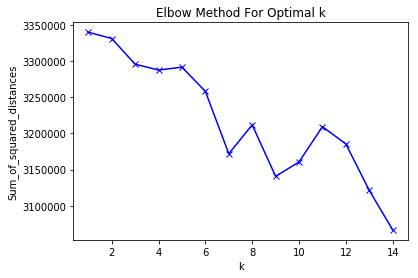

In [6]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [7]:
true_k = 7
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster :", i),
    lista = [terms[ind] for ind in order_centroids[i, :5]]
    print(lista)

Top terms per cluster:
Cluster : 0
['seen', 'child', 'never', 'ever', 'missing']
Cluster : 1
['said', 'trump', 'would', 'like', 'never']
Cluster : 2
['city', 'york', 'police', 'london', 'today']
Cluster : 3
['trump', 'like', 'today', 'time', 'people']
Cluster : 4
['must', 'read', 'trump', 'says', 'people']
Cluster : 5
['bill', 'clinton', 'house', 'hillary', 'trump']
Cluster : 6
['iran', 'deal', 'israel', 'says', 'syria']


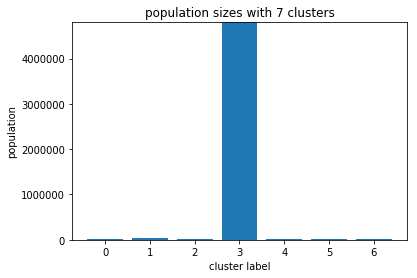

In [24]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import collections

counter=collections.Counter(model.labels_)
y=list(counter.values())[0]
#print ('Silouette_score: ',silhouette_score(X, model.labels_))

plt.bar(range(len(set(model.labels_))), np.bincount(model.labels_))

plt.ylabel('population')
plt.xlabel('cluster label')
plt.title('population sizes with {} clusters'.format(true_k));

# truncate y axis to see the rest better
plt.ylim(0,y);